In [18]:
import imp
compomics_import = imp.load_source('compomics_import', '../../notebooks/compomics_import.py')
from IPython.core.display import HTML
css_file = '../../notebooks/my.css'
HTML(open(css_file, "r").read())

# 1.3 Plotting

There are many Python modules that allow you to plot your data with ease. In this course we will mainly focus on the Python `seaborn`  module to create our graphs. However, the core Python package for plotting is `matplotlib` and most of the other plotting modules build on top of `matplotlib` so we will need to know some basics of these modules as well.

But first let's import `seaborn` and plot a nice histogram of the "Eccentricity" feature in the melanoma data set:

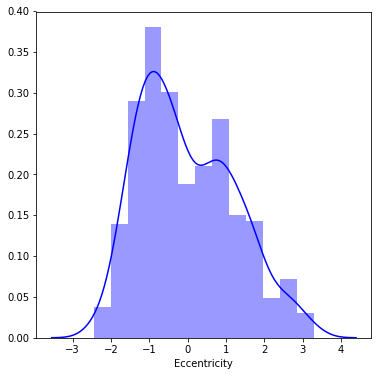

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv("melanoma.csv",sep="\t")

plt.figure(figsize=(6,6))
sns.distplot(dataset['Eccentricity'], color="b")
plt.show()

That was easy. After importing the `seaborn` module we call the function `figure()` in the `matplotlib.pyplot` module to set the size of the plot. Then we call the function `distplot()` of the `seaborn` module to create a histogram. And finally we tell matplotlib to plot the figure. Plot the same distriubtion but only for the data points where the label equals 1.

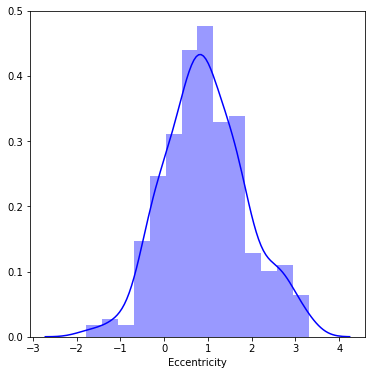

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(dataset[dataset['label']==1]['Eccentricity'], color="b")
plt.show()

The `distplot()`function allows plotting different distributions on top of each other (not all `seaborn` functions allow this). You can do this by calling the `distplot()` function multiple times before calling the `plt.show()`function. Plot a distribution of the "Solidity" feature, showing the data points labeled 1 as a blue distribution and the one labeled 0 as a red distribution.

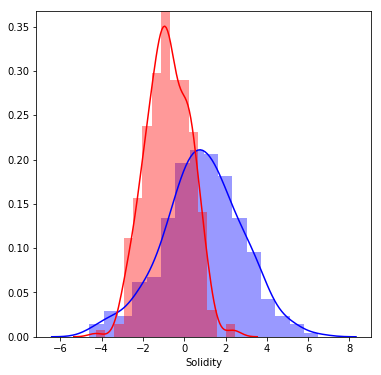

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(dataset[dataset['label']==1]['Solidity'], color="b")
sns.distplot(dataset[dataset['label']==0]['Solidity'], color="r")
plt.show()

Make the same plot but use 50 bins for each distribution.

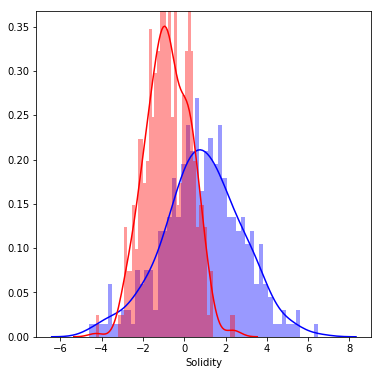

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(dataset[dataset['label']==1]['Solidity'], color="b", bins=50)
sns.distplot(dataset[dataset['label']==0]['Solidity'], color="r", bins=50)
plt.show()

Most plotting functions will have many options that set how the plot will look like. For instance if we create a scatter plot using the `lmplot()` function in the `seaborn` module:

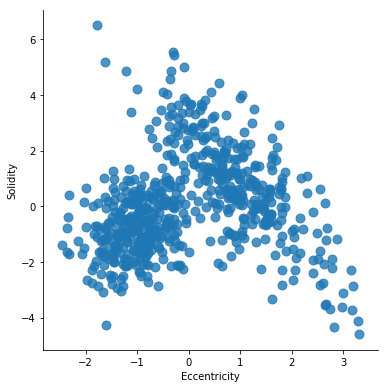

In [23]:
sns.lmplot(x="Eccentricity", y="Solidity", data=dataset, 
           fit_reg=False, size=5.5, scatter_kws={"s": 80})
plt.show()

we have set additional arguments such as `size` that defines the size of the plot and the `scatter_kws` argument that contains settings understood by the `matplotlib` module such as "s" that sets the size of the markers that represent the data points.

Other interesting arguments of `lmplot()` are `hue`, `col` and `row`. The `hue` argument is used to color a point according to its value. Given our data, we may be interested in coloring these points according to their labels:

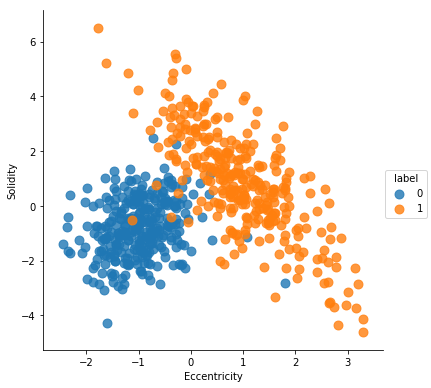

In [24]:
sns.lmplot(x="Eccentricity", y="Solidity", data=dataset, hue="label",
           fit_reg=False, size=5.5, scatter_kws={"s": 80})
plt.show()

The "col" and "row" arguments are similar. We use them to split our plots according to a certain feature. In our dataset, if you have done all the exercises until now (specifically adding a column "new feature 3" to our dataset), there should be two columns that take binary values - "label" and "new feature 3". If we give these column names as arguments to "row" and "col", respectively, the resulting plot will be such that for each row we have a different value of the variable we passed on to "row", and on each column a different value of the variable we passed to "column". This way we can see the distribution of our data across subsets that we obtained by splitting our data according to these variables.

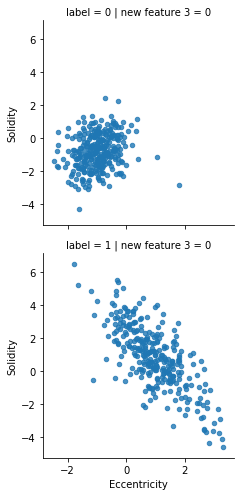

In [25]:
import numpy as np

dataset["new feature 3"] = np.random.randint(0,1,len(dataset))

sns.lmplot(x="Eccentricity", y="Solidity", data=dataset, row="label", col="new feature 3",
           fit_reg=False, size=3.5, scatter_kws={"s": 20})
plt.show()

If you want to draw something on a plot, like a line or a point, we use the `matplotlib` functions:

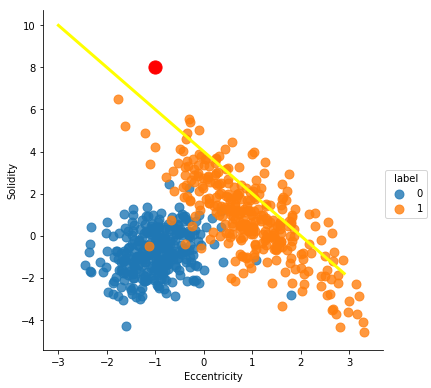

In [26]:
sns.lmplot(x="Eccentricity", y="Solidity", data=dataset, hue="label",
           fit_reg=False, size=5.5, scatter_kws={"s": 80})

x = np.arange(-3,3,0.1)
y = -2*x+4

plt.plot(x, y, color='yellow',linewidth=3)
plt.scatter(-1,8,s=173,color='red')
plt.show()

To get some familiarity with these plotting tools, create a scatter plot where the $x$ axis is "Solidity", the $y$ axis is Eccentricity, the points are colored according to "new feature 3" and with a pink point at coordinates (11,0)

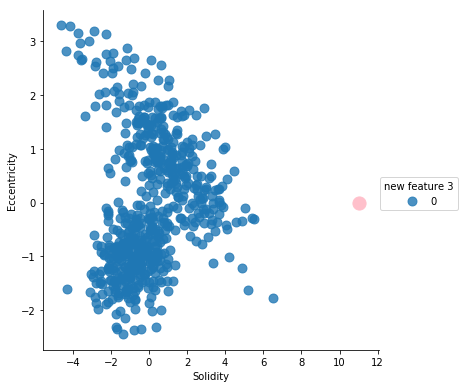

In [27]:
sns.lmplot(x="Solidity", y="Eccentricity", data=dataset, hue="new feature 3",
           fit_reg=False, size=5.5, scatter_kws={"s": 80})

plt.scatter(11,0,s=173,color='pink')
plt.show()

To plot a continuous feature against a categorical one we can use the `factorplot()` function in `seaborn`. This function expects the `x` argument to be column containing a categorical variable, while the `y`argument should be column containing a continous argument. The `factorplot()` function has arguments `hue`, `col` and `row` to split the plot by value.

Let's plot the "Eccentricity" column as a boxplot and split it by the values in categorical column "label":

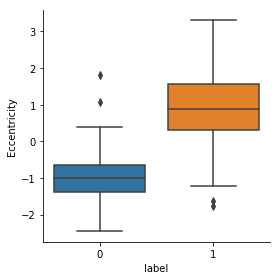

In [28]:
sns.factorplot(kind="box",x="label", y="Eccentricity", data=dataset)
plt.show()

Replace the boxplot by a violinplot and split the plot in two columns according to the "new feature 3" column.

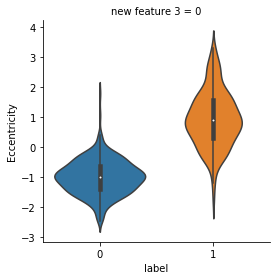

In [29]:
sns.factorplot(kind="violin",x="label", y="Eccentricity", data=dataset, col="new feature 3")
plt.show()

To plot different columns on the same plot it is much more easy to use the plotting functions of the pandas package as the focus of pandas is on columns. For instance if we want to plot a boxplot for all the "Eccentricity" and "Solidity" feature in the melanoma data set we can simple do:

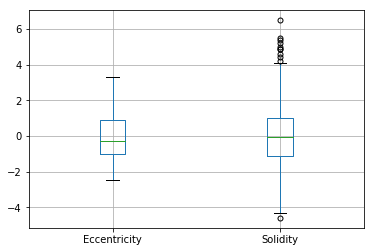

In [30]:
dataset[["Eccentricity","Solidity"]].boxplot(flierprops=dict(marker='o', markersize=5))
plt.show()

We have some possibilitis for customization with these plots, for instance, if you prefer the boxplots to be horizontal rather than vertical:

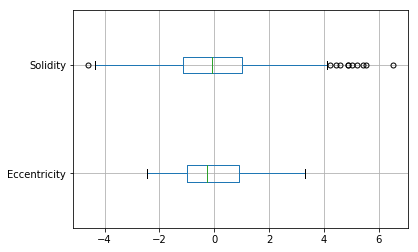

In [31]:
dataset[["Eccentricity","Solidity"]].boxplot(vert=False,flierprops=dict(marker='o', markersize=5))
plt.show()

Another example is the `plot()` function of a pandas dataframe. It will plot all the columns in a dataframe as a line on a scatter plot where the y-axis represents the column values and the x-axis represents the row numbers. Here we plot the columns "Eccentricity" en "Solidity" using `plot()`:

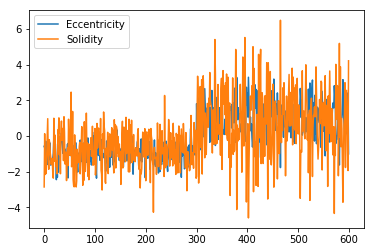

In [32]:
dataset[["Eccentricity","Solidity"]].plot()
plt.show()

Load the data set "heart.csv" [1] in a variable called `heart_data`.

In [33]:
heart_data = pd.read_csv("heart.csv",sep=" ")

This data set contains 270 patients described by 13 features and annotated as '2' if the patient suffers from heart disease and '1' if not. 

The features are:

1. age       
2. sex       
3. chest pain type  (4 values)       
4. resting blood pressure  
5. serum cholestoral in mg/dl      
6. fasting blood sugar > 120 mg/dl       
7. resting electrocardiographic results  (values 0,1,2) 
8. maximum heart rate achieved  
9. exercise induced angina    
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment     
12. number of major vessels (0-3) colored by flourosopy        
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect    

Plot a boxplot of feature 8 and split it by label, feature 3 and feature 6.

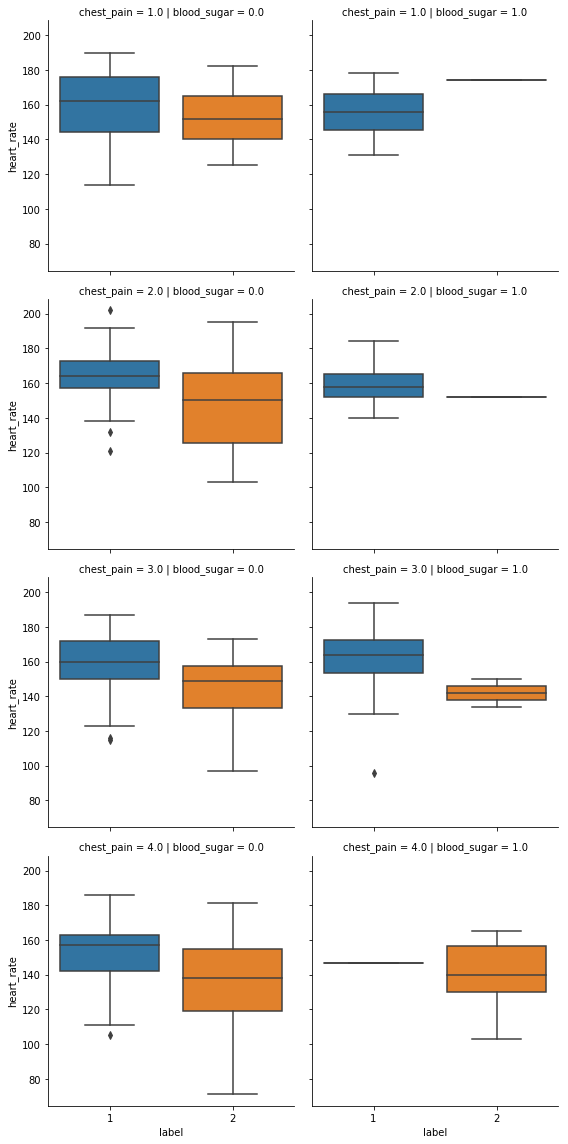

In [34]:
sns.factorplot(kind="box",x="label",y="heart_rate",data=heart_data,col="blood_sugar",row="chest_pain")
plt.show()

Now check the relationship between features 4 and 8. Is this relationship different for different sexes?

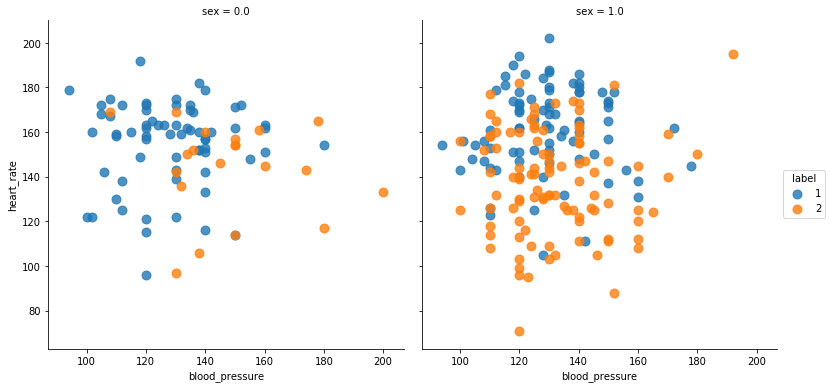

In [35]:
sns.lmplot(x="blood_pressure", y="heart_rate", data=heart_data, hue="label", col='sex',
           fit_reg=False, size=5.5, scatter_kws={"s": 80})
plt.show()

> [1] Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 